# LMAPR1492 : tâche 8

## Analyse de la structure de bande du cristal de C

In [125]:
from pymatgen import Structure, Lattice, Molecule
from pymatgen.ext.matproj  import MPRester
from pymatgen.electronic_structure import bandstructure, plotter
from pymatgen.electronic_structure.plotter import BSPlotter
from jupyter_jsmol.pymatgen import quick_view
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
import numpy as np
import matplotlib.pyplot as plt

### Téléchargement de la structure de bande du cristal de C

In [126]:
with MPRester("MoXgF85AP31iKfy0") as m:
    structure =  m.get_structure_by_material_id("mp-169")
    bandes = m.get_bandstructure_by_material_id("mp-169")
    
print(bandes.get_vbm()['band_index'])
print(bandes.get_cbm()['band_index'])

defaultdict(<class 'list'>, {<Spin.up: 1>: [3]})
defaultdict(<class 'list'>, {<Spin.up: 1>: [4]})


### Détermination de la bande interdire 

In [127]:
gap = bandes.get_band_gap()
energie = gap.get("energy")
directe_bol = gap.get("direct")
print("L'énergie de la bande interdite est de "+ str(energie)+" eV. Cela vaut dire dire que nous sommes en présence d'un bon        conducteur d'électricité.")
if directe_bol == True :
    print("La bande interdite est directe, c'est-à-dire que les bandes de conduction et de valence ont un extremum dans un interval très  petit de quantité de mouvement.")
else: 
    print("La bande interdite est indirecte.") 
print("Le vecteur de transition vers la zone de Brillouin du cristal a une direction qui est "+gap["transition"] )

L'énergie de la bande interdite est de 0.19809999999999972 eV. Cela vaut dire dire que nous sommes en présence d'un bon        conducteur d'électricité.
La bande interdite est directe, c'est-à-dire que les bandes de conduction et de valence ont un extremum dans un interval très  petit de quantité de mouvement.
Le vecteur de transition vers la zone de Brillouin du cristal a une direction qui est (0.500,0.159,-0.159)-(0.500,0.159,-0.159)


### Direction dans laquelle la dernière (première) bande de valence (conduction) présente le plus et le moins de dispersion

La plus grande dispersion dans la dernière bande de valence se produit dans la direction X|Q - FP1 (flèche bleue)
La plus petite dispersion dans la dernière bande de valence se produit dans la direction  Z - Γ (flèche rouge)


La plus grande dispersion dans la première bande de conduction se produit dans la direction Z - Γ (flèche jaune)
La plus petite dispersion dans la première bande de conduction se produit dans la direction Z - LP (flèche verte)


Structures des bandes électroniques du C :


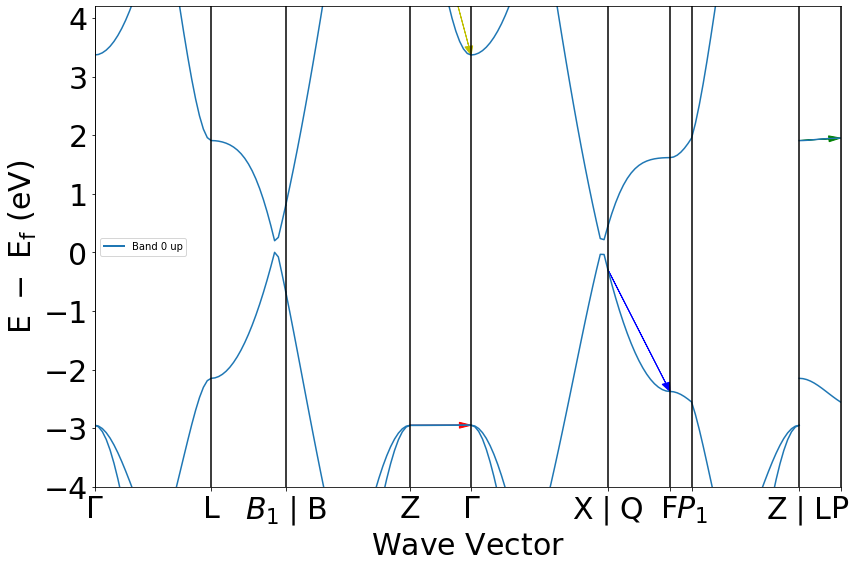

In [128]:
energie = data.get('energy')
distance = data.get('ticks').get('distance')
BSPlotter(bandes).bs_plot_data()
BSPlotter(bandes).get_plot()
pics = [distance[0], distance[1], distance[3], distance[4], distance[6], distance[8], distance[9], distance[11], distance[13], distance[14]]
pente_V = []
pente_C =[]
for i in range(9):
    pente_V.append( abs(((energie.get('1')[i][3])[-1] - (energie.get('1')[i][3])[0])/(pics[i+1]-pics[i]) ))
    pente_C.append( abs(((energie.get('1')[i][4])[-1] - (energie.get('1')[i][4])[0])/(pics[i+1]-pics[i]) ))

print("La plus grande dispersion dans la dernière bande de valence se produit dans la direction X|Q - FP1 (flèche bleue)")
print("La plus petite dispersion dans la dernière bande de valence se produit dans la direction  Z - Γ (flèche rouge)")
print("\n")
print("La plus grande dispersion dans la première bande de conduction se produit dans la direction Z - Γ (flèche jaune)")
print("La plus petite dispersion dans la première bande de conduction se produit dans la direction Z - LP (flèche verte)")





IdxV = [(np.where(pente_V==ExtrV[0]))[0][0], (np.where(pente_V==ExtrV[1]))[0][0]]
IdxC = [(np.where(pente_C==ExtrC[0]))[0][0], (np.where(pente_C==ExtrC[1]))[0][0]] 
Idx = [IdxV[0], IdxV[1], IdxC[0], IdxC[1]]
ExtrC = [np.amax(pente_C), np.amin(pente_C)]
ExtrV = [np.amax(pente_V), np.amin(pente_V)] 
print("\n")
print("Structures des bandes électroniques du C :")
plt.arrow(pics[Idx[3]], (energie.get('1')[Idx[3]][4])[0],pics[Idx[3]+1] - pics[Idx[3]], 
              (energie.get('1')[Idx[3]][4])[-1] - (energie.get('1')[Idx[3]][4])[0], 
             color='g',length_includes_head=True, head_width=0.1)
plt.arrow(pics[Idx[2]], (energie.get('1')[Idx[2]][4])[0],pics[Idx[2]+1] - pics[Idx[2]], 
              (energie.get('1')[Idx[2]][4])[-1] - (energie.get('1')[Idx[2]][4])[0], 
             color='y',length_includes_head=True,head_width=0.1)
plt.arrow(pics[Idx[1]], (energie.get('1')[Idx[1]][3])[0],pics[Idx[1]+1] - pics[Idx[1]], 
              (energie.get('1')[Idx[1]][3])[-1] - (energie.get('1')[Idx[1]][3])[0], 
             color='r',length_includes_head=True,head_width=0.1)
plt.arrow(pics[Idx[0]], (energie.get('1')[Idx[0]][3])[0],pics[Idx[0]+1] - pics[Idx[0]], 
              (energie.get('1')[Idx[0]][3])[-1] - (energie.get('1')[Idx[0]][3])[0], 
             color='b',length_includes_head=True,head_width=0.1)

plt.show()


### Masse effective

La formule pour déterminer la masse effective est $$m^* = \hbar^2\left(\frac{\partial^2E(k)}{\partial k^2}\right)^{-1} ,$$ où E(k) est l'énergie d'un électron dont le vecteur d'onde est k et $\hbar$ qui est la constante de Dirac qui vaut environ  1,054 571 817  10$^{-34}$ J s. Nous faisons aussi l'hypothèse que E(k) a une dispersion parabolique. Cela vaut dire E(k) = ak$^2$+bk+c avec a,b et c des constantes à déterminer. En dérivant, nous avons pour remplacer la parenthèse $\frac{1}{2a}$.

#### Au sommet de la dernière bande de valence

In [129]:
h_barre = 1.054572e-34
vbm =  bandes.get_vbm()
energie = vbm['energy']
k = vbm['kpoint'].cart_coords
print(k)
masse = h_barre**2/ (2*k[0])
print("La masse effective au sommet de la dernière bande de valence est de "+ str(masse) +"kg")

[ 0.50741447 -0.86682486 -1.37037853]
La masse effective au sommet de la dernière bande de valence est de 1.0958714896005275e-68kg


#### A la base de la première bande de conduction 

In [130]:
cbm =  bandes.get_cbm()
energie = cbm['energy']
kc = cbm['kpoint'].cart_coords
print(kc)
masse = h_barre**2/ (2*kc[0])
print("La masse effective à la base de la première bande de conduction est de "+ str(masse) +"kg")

[ 0.50741447 -0.86682486 -1.37037853]
La masse effective à la base de la première bande de conduction est de 1.0958714896005275e-68kg
